In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
from shapely import geometry
from shapely.ops import cascaded_union
import matplotlib
from matplotlib import pyplot as plt

Create the array for imaging in 10X, 20 mm for 20 mm size. What are the image sizes?

In [4]:
objectives = ['60X', '10X']
micronsPerPixel = [0.11, 0.67]

for i in range(2):
    print(f'{objectives[i]} objective, {micronsPerPixel[i]:1.2f} um x 2048 = {micronsPerPixel[i]*2048:4.2f} um')


60X objective, 0.11 um x 2048 = 225.28 um
10X objective, 0.67 um x 2048 = 1372.16 um
60X objective, 0.11 um x 2048 = 225.28 um
10X objective, 0.67 um x 2048 = 1372.16 um


In [5]:
20000/1372

14.577259475218659

14.577259475218659

In [8]:
expName = 'BC117'
expDate = '210627'

So, a 15 x 15 array should be enough for sample 1

In [9]:
sample = 1

notebookFolder = f'c:/Users/Leonardo/Dropbox/research/analysis/BreastCancer/notebook/{expDate}_{expName}_BG_test/'
positionsFolder = 'c:/Software/merfish-parameters/positions/'
imagingSettingsFolder = f'c:/Software/imaging-settings/{expDate}_{expName}/' 
nrows = 11  # even number 
ncols = 17 # any number
dxy = 1372 # separation between fov center (in microns)

X = []
Y = []

Xcoor = np.arange(-int(ncols/2),int(ncols/2),1)
Ycoor = np.arange(-int(nrows/2),int(nrows/2),1)

for i in Ycoor:
    if np.mod(i,2):
        currentXcoor = Xcoor
    else:
        currentXcoor = np.flip(Xcoor)
        
    for j in currentXcoor:
        Y.append(i*dxy)
        X.append(j*dxy)
        
for i in np.flip(Ycoor):
    Y.append(i*dxy)
    X.append((min(Xcoor)-1)*dxy)
    
    
positions = pd.DataFrame({'X':X,'Y':Y})

# save intermediateddata to image settings folder
outputName = f'positions_{expName}_sample_{sample}_{nrows}x{ncols+1}.txt'

outputPath = f'{imagingSettingsFolder}sample_0{sample}/{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

# save to positions folder
outputPath = f'{positionsFolder}{outputName}'
np.savetxt(outputPath, positions, delimiter=',')
print(f'{positions.shape[0]} positions saved to {outputPath}!')

170 positions saved to c:/Software/imaging-settings/210627_BC117/sample_01/positions_BC117_sample_1_11x18.txt!
170 positions saved to c:/Software/merfish-parameters/positions/positions_BC117_sample_1_11x18.txt!
170 positions saved to c:/Software/imaging-settings/210627_BC117/sample_01/positions_BC117_sample_1_11x18.txt!
170 positions saved to c:/Software/merfish-parameters/positions/positions_BC117_sample_1_11x18.txt!


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


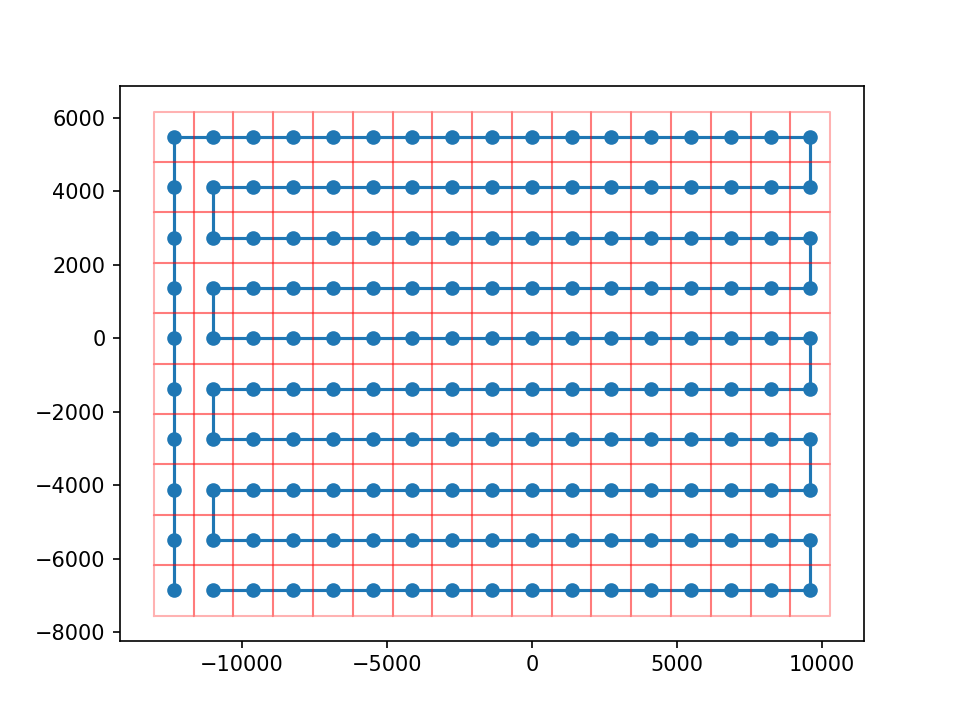

In [10]:
fig = plt.subplots()
plt.plot(X,Y,'o-')

fovPixels = 2048
micronPerPixel = 0.67
fovWidth = fovPixels*micronPerPixel
for i in range(len(X)):
    plt.plot([X[i]-fovWidth/2, X[i]+fovWidth/2, X[i]+fovWidth/2, X[i]-fovWidth/2, X[i]-fovWidth/2],
         [Y[i]-fovWidth/2, Y[i]-fovWidth/2, Y[i]+fovWidth/2, Y[i]+fovWidth/2, Y[i]-fovWidth/2], 'r-',lw=1,alpha=0.3)
    
    
# plt.axis('equal')
 

In [ ]:
X